In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
#!pip install --upgrade geopandas plotly
import geopandas as gpd
import plotly.express as px
import folium
from shapely.geometry import Point
from shapely.geometry import shape
from shapely.geometry import Polygon
import contextily as cx
from geopandas.tools import sjoin

In [2]:
# ---------------------- GEOPANDAS MEXICO -------------
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
states = gpd.read_file('mapa_mexico/Division_Municipal_Mexico_2010.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

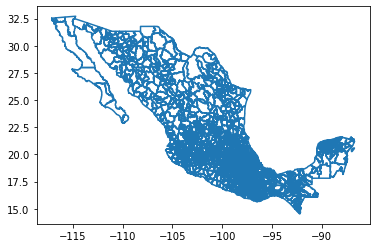

In [5]:
states.boundary.plot()

In [4]:
df_states_location = states.loc[:, ['Area','geometry']]
df_states_location

Area                                           geometry
0      1122.661145  POLYGON ((-117.09481 32.41141, -117.09481 32.4...
1      3670.991923  POLYGON ((-116.73791 32.56703, -116.65926 32.5...
2     13119.275713  POLYGON ((-115.81505 32.64088, -115.70466 32.6...
3       517.120801  POLYGON ((-117.06254 32.34436, -117.06276 32.3...
4      9033.770278  POLYGON ((-114.96166 32.36465, -114.96239 32.3...
...            ...                                                ...
2475    233.070389  POLYGON ((-92.15077 14.72499, -92.15014 14.723...
2476    303.371304  POLYGON ((-96.75636 16.72003, -96.75270 16.719...
2477      7.201493  POLYGON ((-96.74966 16.56239, -96.74989 16.562...
2478     31.195331  POLYGON ((-96.78255 16.59149, -96.79727 16.605...
2479      9.495648  POLYGON ((-96.74966 16.56239, -96.74704 16.564...

[2480 rows x 2 columns]

In [13]:
#-------------------------------- GAS REGUlAR INEGI CONEVAL ----------
path7 = 'Gas_Regular_Nacional_Final.csv'
df_gas_regular_nacional_mx = pd.read_csv(path7, index_col=0, sep=',', encoding='latin-1')
df_gas_regular_nacional_mx.rename(columns = {'x':'longitude', 'y':'latitude'}, inplace = True)
#df_gas_regular_nacional_mx.groupby('NOMEDO').mean()

In [7]:
#-------------------------------- GAS PREMIUM INEGI CONEVAL ----------
path8 = 'Gas_Premium_Nacional_Final.csv'
df_gas_premium_nacional_mx = pd.read_csv(path8, index_col=0, sep=',', encoding='latin-1')
df_gas_premium_nacional_mx.rename(columns = {'x':'longitude', 'y':'latitude'}, inplace = True)
#df_gas_premium_nacional_mx.groupby('NOMEDO').mean()

In [8]:
#-------------------------------- DIESEL INEGI CONEVAL ----------
path9 = 'Diesel_Nacional_Final.csv'
df_diesel_nacional_mx = pd.read_csv(path9, index_col=0, sep=',', encoding='latin-1')
df_diesel_nacional_mx.rename(columns = {'x':'longitude', 'y':'latitude'}, inplace = True)
#df_diesel_nacional_mx.groupby('NOMEDO').mean()

In [10]:
df_gas_regular_nacional_mx = gpd.GeoDataFrame(
    df_gas_regular_nacional_mx, geometry= gpd.points_from_xy(df_gas_regular_nacional_mx.longitude, df_gas_regular_nacional_mx.latitude))

C:\Users\odie2\anaconda3\envs\gasolina_enviorment\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 22 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


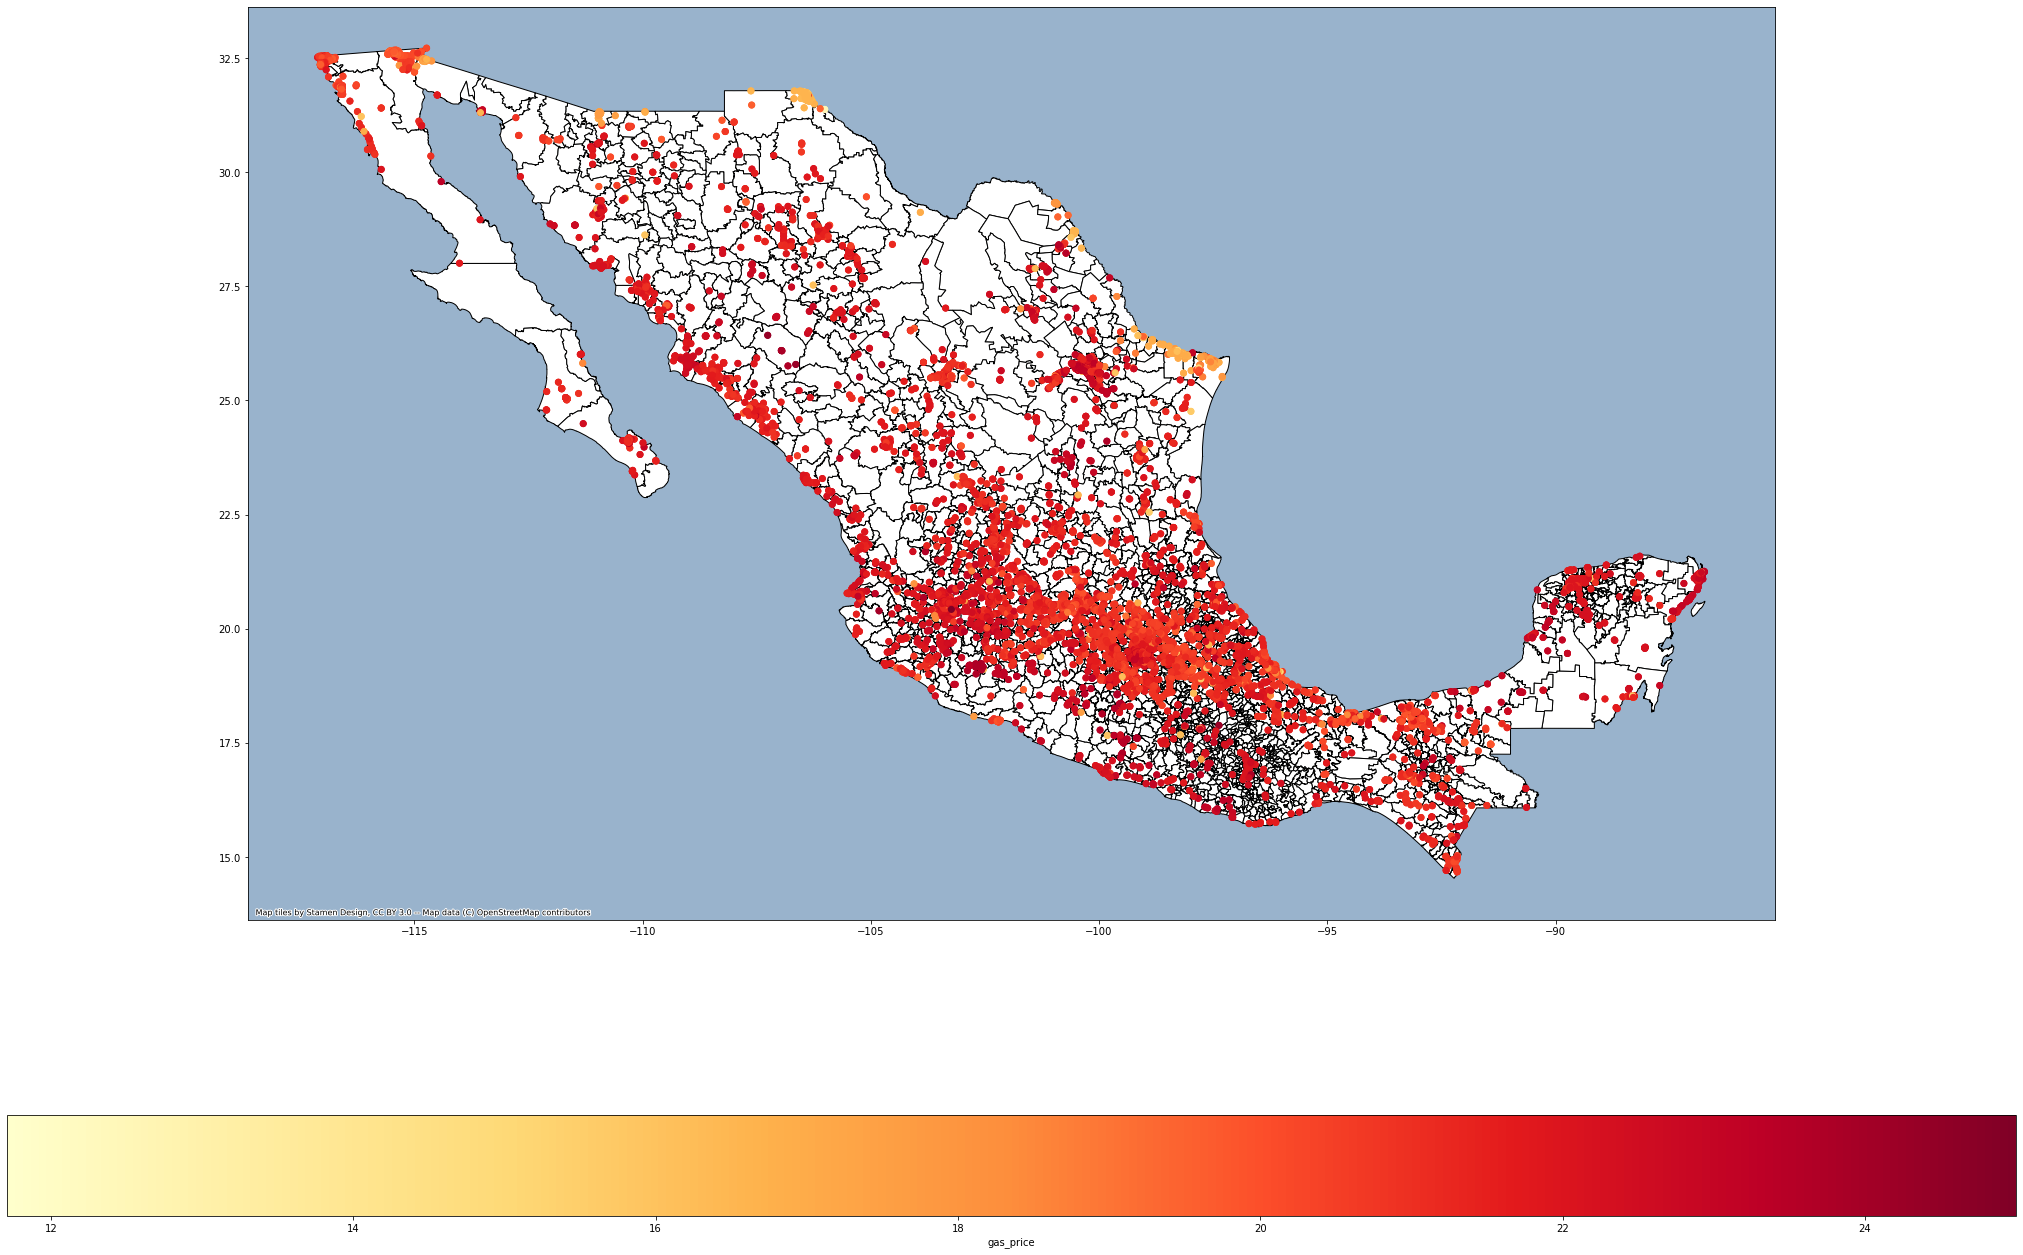

In [11]:
ax = states.plot(color='white', edgecolor='black', figsize=(36,24))
cx.add_basemap(ax)

df_gas_regular_nacional_mx.plot(ax=ax, cmap="YlOrRd",column='gas_price')

df_gas_regular_nacional_mx.plot(column ='gas_price', cmap='YlOrRd', ax=ax, legend = True , legend_kwds = {'label': "gas_price", 'orientation': "horizontal"})

plt.show()

C:\Users\odie2\anaconda3\envs\gasolina_enviorment\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 22 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


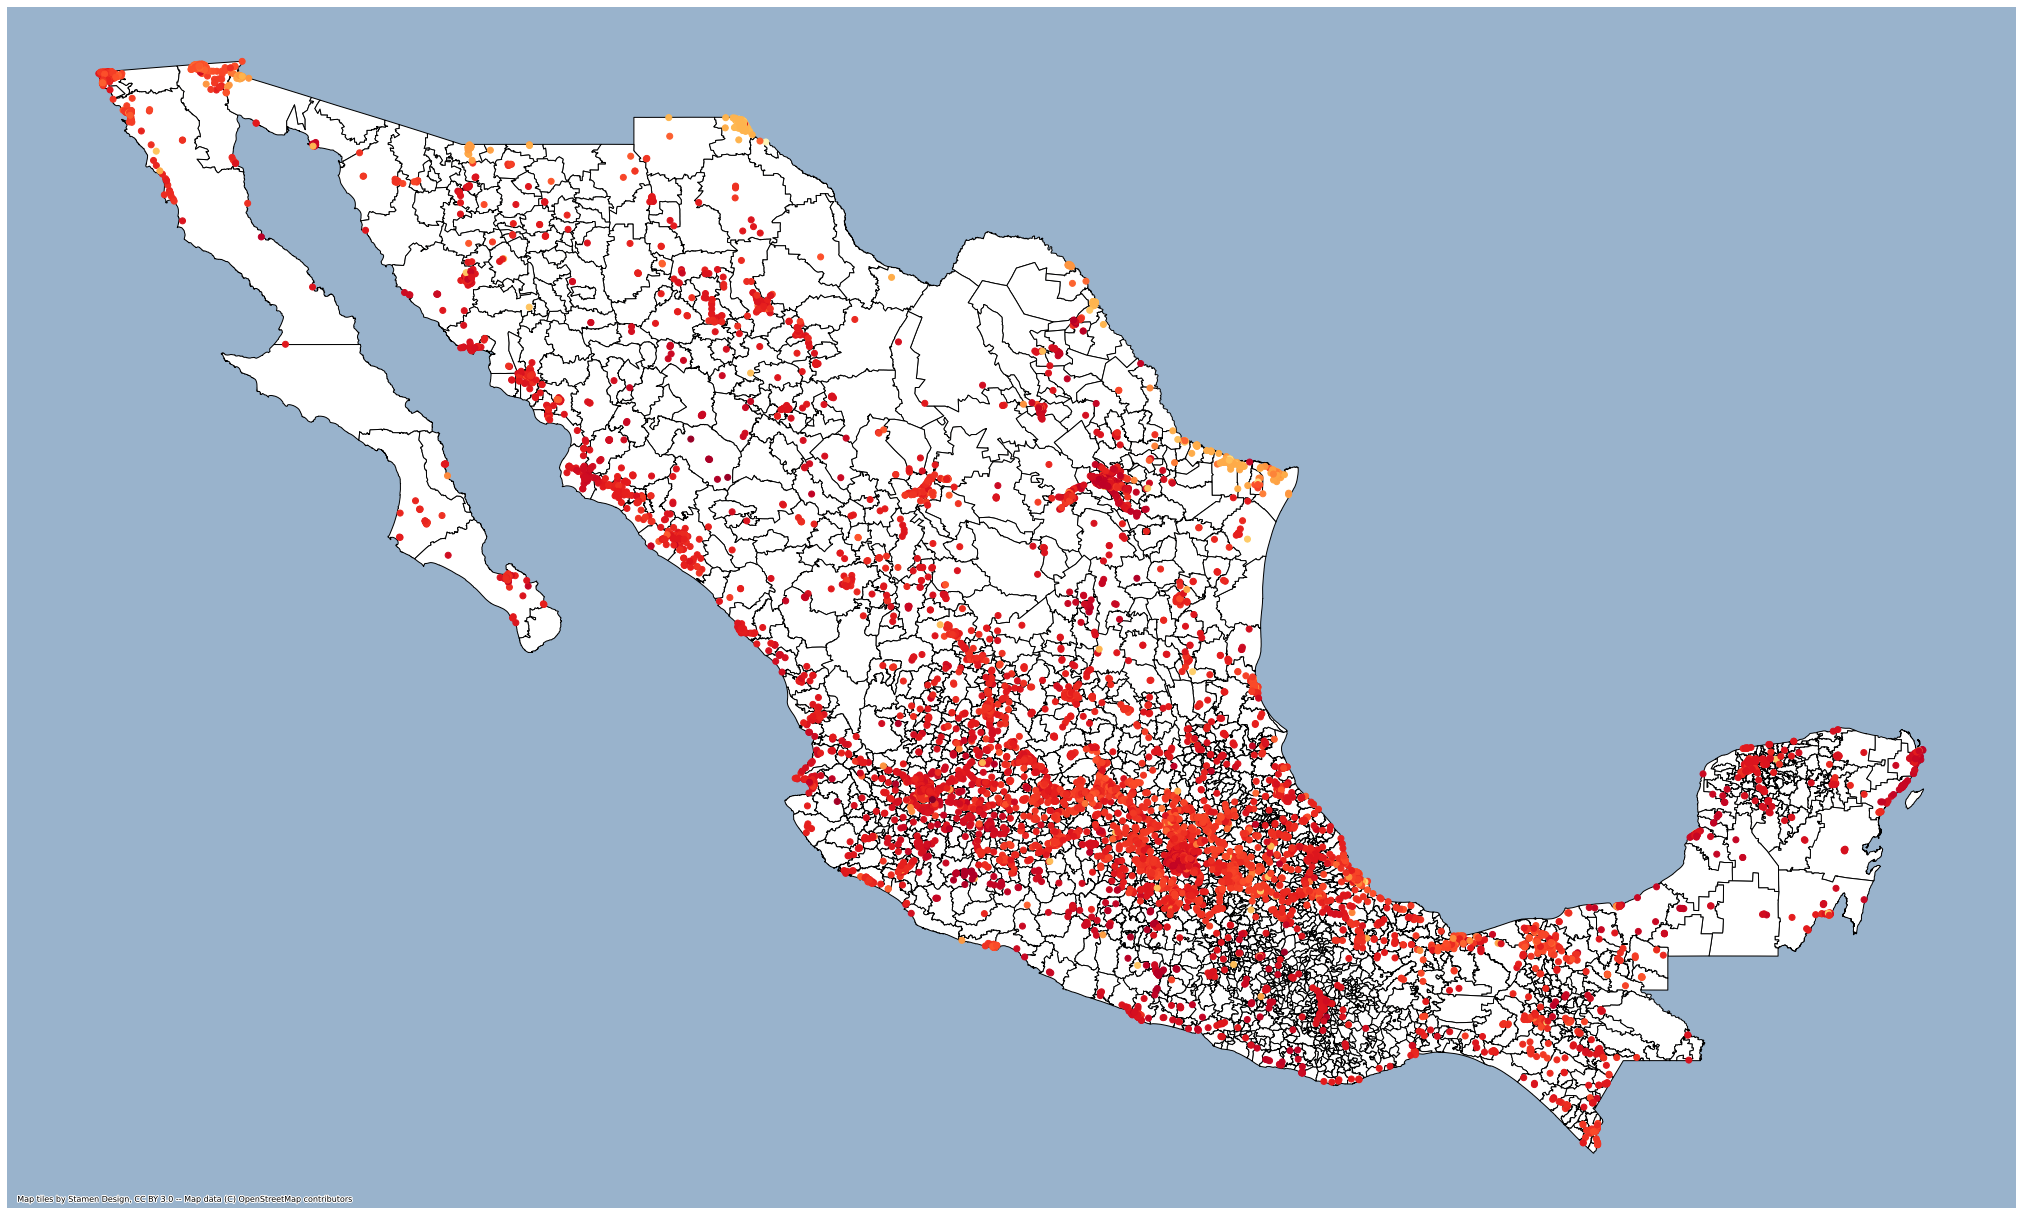

In [12]:
ax = states.plot(color='white', edgecolor='black', figsize=(36,24))
df_gas_regular_nacional_mx.plot(column="gas_price", cmap='YlOrRd', ax=ax)
ax.axis('off')
cx.add_basemap(ax)

In [25]:
#-----------------------------------GAS REGULAR--LOCATION -------------
df_gas_inegi_regular_final_location = pd.merge(df_states_location, df_gas_regular_nacional_mx)
df_gas_inegi_regular_final_location

Area                                           geometry  \
0      1122.661145  POLYGON ((-117.09481 32.41141, -117.09481 32.4...   
1      1122.661145  POLYGON ((-117.09481 32.41141, -117.09481 32.4...   
2      1122.661145  POLYGON ((-117.09481 32.41141, -117.09481 32.4...   
3      1122.661145  POLYGON ((-117.09481 32.41141, -117.09481 32.4...   
4      1122.661145  POLYGON ((-117.09481 32.41141, -117.09481 32.4...   
...            ...                                                ...   
11401   233.070389  POLYGON ((-92.15077 14.72499, -92.15014 14.723...   
11402   233.070389  POLYGON ((-92.15077 14.72499, -92.15014 14.723...   
11403   233.070389  POLYGON ((-92.15077 14.72499, -92.15014 14.723...   
11404   233.070389  POLYGON ((-92.15077 14.72499, -92.15014 14.723...   
11405     9.495648  POLYGON ((-96.74966 16.56239, -96.74704 16.564...   

       place_id  ENTIDAD         MUN   LOC       POBTOT       POBFEM  \
0          2039      2.0    3.906977  1531  4418.367442  2191.265116   
1          2044      2.0    3.906977  1531  4418.367442  2191.265116   
2          2053      2.0    3.906977  1531  4418.367442  2191.265116   
3          2062      2.0    3.906977  1531  4418.367442  2191.265116   
4          2064      2.0    3.906977  1531  4418.367442  2191.265116   
...         ...      ...         ...   ...          ...          ...   
11401      4633      7.0   87.000000   183   303.037594   153.015038   
11402     10852      7.0   87.000000   183   303.037594   153.015038   
11403     10860      7.0   87.000000   183   303.037594   153.015038   
11404     21594      7.0   87.000000   183   303.037594   153.015038   
11405      6233     20.0  172.000000    17   224.400000   118.800000   

            POBMAS       P_0A2  ...           NOMEDO  \
0      2224.618605  175.748837  ...  Baja California   
1      2224.618605  175.748837  ...  Baja California   
2      2224.618605  175.748837  ...  Baja California   
3      2224.618605  175.748837  ...  Baja California   
4      2224.618605  175.748837  ...  Baja California   
...            ...         ...  ...              ...   
11401   147.436090   18.781955  ...          Chiapas   
11402   147.436090   18.781955  ...          Chiapas   
11403   147.436090   18.781955  ...          Chiapas   
11404   147.436090   18.781955  ...          Chiapas   
11405   105.600000    9.400000  ...           Oaxaca   

                                                    name  pobreza  vul_car  \
0             ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.     29.5     33.1   
1                      ESTACION RAEL, S. DE R.L. DE C.V.     29.5     33.1   
2                              CIRCULO DOS, S.A. DE C.V.     29.5     33.1   
3                            Becktrop Operadora SA de CV     29.5     33.1   
4                     ESTACION LA VICTORIA, S.A. DE C.V.     29.5     33.1   
...                                                  ...      ...      ...   
11401      GASOLINERA Y LUBRICANTES FRONTERIZOS SA DE CV     68.6     28.0   
11402               GASOLINERA CENTRO LOGISTICO SA DE CV     68.6     28.0   
11403  OPERADORA DE COMBUSTIBLES CENTRO LOGISTICO SA ...     68.6     28.0   
11404                  MEGA SERVICIO TAPACHULA S.A DEC.V     68.6     28.0   
11405                                 LEONARDO DIAZ CRUZ     68.7     27.7   

       ic_rezedu  ic_asalud  ic_segsoc  ic_cv  ic_sbv  pobreza_e  
0           12.7       21.0       46.3    8.4     7.3        1.8  
1           12.7       21.0       46.3    8.4     7.3        1.8  
2           12.7       21.0       46.3    8.4     7.3        1.8  
3           12.7       21.0       46.3    8.4     7.3        1.8  
4           12.7       21.0       46.3    8.4     7.3        1.8  
...          ...        ...        ...    ...     ...        ...  
11401       36.8       33.7       87.2   45.0    68.7       22.7  
11402       36.8       33.7       87.2   45.0    68.7       22.7  
11403       36.8       33.7       87.2   45.0    68.7      

C:\Users\odie2\anaconda3\envs\gasolina_enviorment\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 22 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


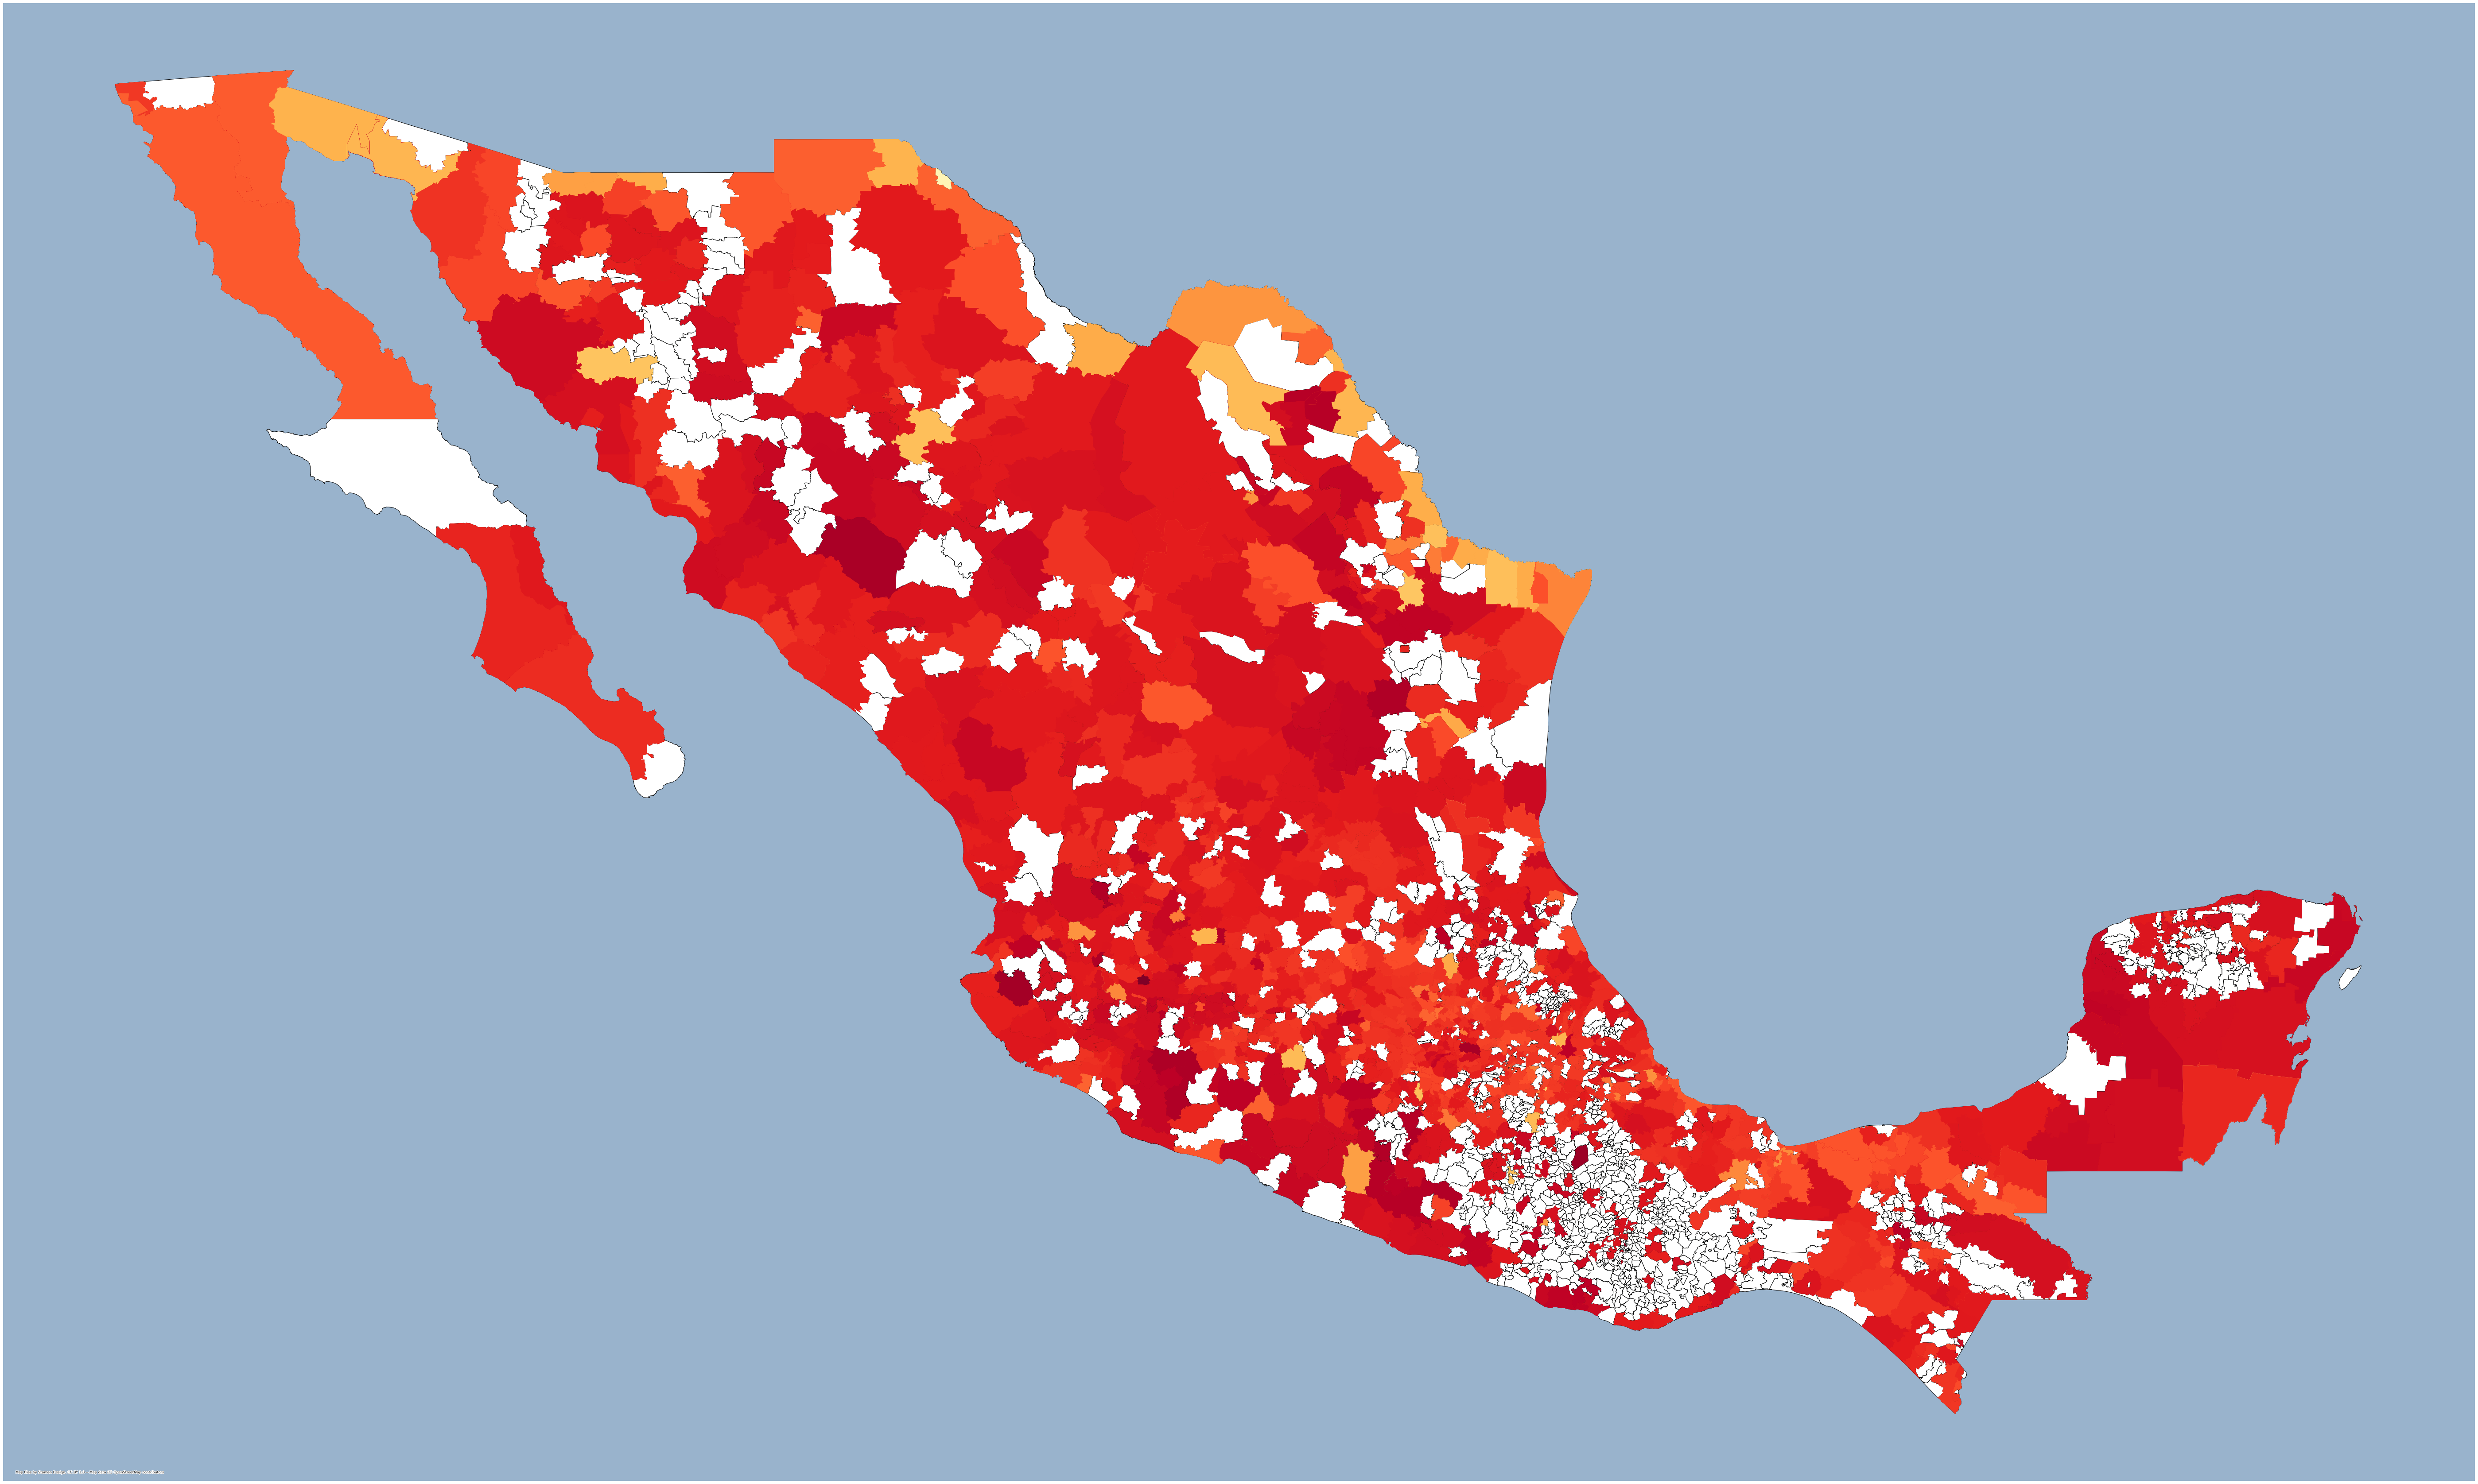

In [27]:
ax = states.plot(color='white', edgecolor='black', figsize=(100,100))
df_gas_inegi_regular_final_location.plot(column="gas_price", cmap='YlOrRd', ax=ax)
ax.axis('off')
cx.add_basemap(ax)

In [26]:
type(df_gas_inegi_regular_final_location)

geopandas.geodataframe.GeoDataFrame